In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt





In [3]:
def image_toarray(path):

    try:
        img = Image.open(path).convert("L")
        img = img.resize((28, 28))
        digit_array = np.array(img)
      
        return digit_array
    except FileNotFoundError:
        
        print("shit's fucked up")
    except Exception as e:
        print("something's fucked up:", e)


In [4]:
def make_my_image(img_data):
    plt.imshow(img_data, cmap="binary")
    plt.axis("off")  # Removes axes for better visualization
    plt.show(block="True")


In [5]:
paths = r"G:\elephant.png"
data = image_toarray(paths)
if data is not None:  # Fix incorrect condition check
    make_my_image(data)

shit's fucked up


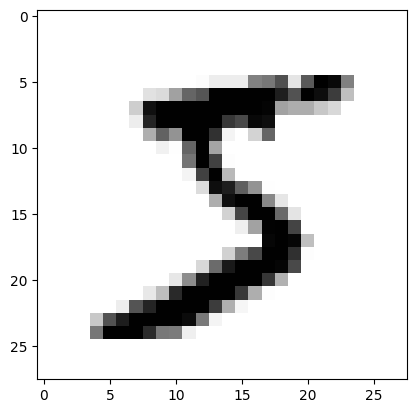

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
dataa=fetch_openml("mnist_784",as_frame=False)

classifier=SGDClassifier(random_state=42)
x,y=dataa.data,dataa.target

def plot(numbo):
    img=numbo.reshape((28,28))
    plt.imshow(img,cmap="binary")
    plt.show()
    
some_digit=x[0]    
pict=plot(some_digit)




In [7]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

y_train_9=(y_train=="5")
y_test_9=(y_train=="5")

classifier.fit(x_train,y_train_9)
classifier.predict([some_digit])

array([ True])

In [8]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(classifier,x_train,y_train_9,cv=3,scoring="accuracy")
print(cvs)

[0.95035 0.96035 0.9604 ]


In [9]:
from sklearn.dummy import DummyClassifier
dummmyclass=DummyClassifier(strategy="most_frequent")
dummmyclass.fit(x_train,y_train_9)
dummmyclass.predict([some_digit])

array([False])

In [10]:
cvss=cross_val_score(dummmyclass,x_train,y_train_9,cv=3,scoring="accuracy")
print(cvss)

[0.90965 0.90965 0.90965]


In [11]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
import numpy as np
skfolds=StratifiedKFold(n_splits=3)

for train_index,test_index in skfolds.split(x_train,y_train_9):
    clone_model=clone(classifier)
    x_train_folds=x_train[train_index]
    x_test_folds=x_train[test_index]
    y_train_folds=y_train_9[train_index]
    y_test_folds=y_train_9[test_index]
    
    
    clone_model.fit(x_train_folds,y_train_folds)
    y_pred=clone_model.predict(x_test_folds)
    cor_pred=np.sum(y_pred== y_test_folds).astype("int")
    cv=cor_pred/len(y_pred)
    print(cv)
    
    

0.95035
0.96035
0.9604


In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(classifier,x_train,y_train_9,cv=3)


In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_9,y_train_pred)


In [13]:
from sklearn.metrics import precision_score,recall_score
print(precision_score())
print(precision_score(y))